In [208]:
import pandas as pd
import numpy as np
from collections import Counter

### Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

### Remove unnecessary warnings

import warnings
warnings.filterwarnings('ignore')


In [209]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [211]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

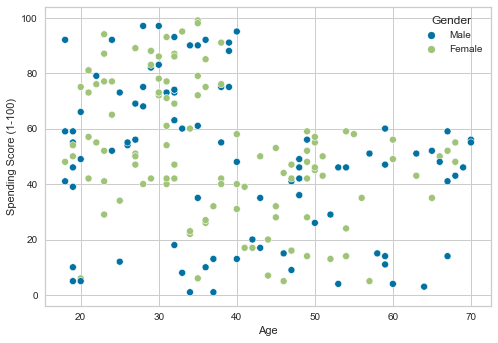

In [212]:
sns.scatterplot(x="Age",y="Spending Score (1-100)",data=df,hue="Gender")
plt.show()

**Outlier var mı?**

In [213]:
def detect_outliers(df, n, features_list):
    outlier_indices = [] 
    for feature in features_list: 
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

In [214]:
detect_outliers(df,2,['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

[]

In [215]:
df.drop("CustomerID",axis=1,inplace=True)

In [216]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

# **Clustering**

## **1.Age and Spending Score**

In [217]:
X = df[["Age","Spending Score (1-100)"]].values
X

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

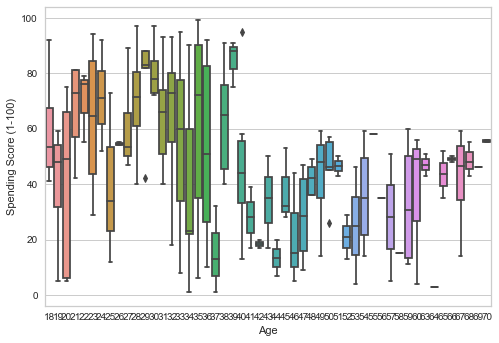

In [218]:
sns.boxplot(x="Age",y="Spending Score (1-100)",data=df)

In [219]:
a = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(X)
    a.append(kmeans.inertia_)
a

[171535.5,
 75949.15601023019,
 45840.67661610867,
 28165.58356662934,
 23838.24882164619,
 19483.1179104427,
 15514.193134351035,
 13006.48362885102,
 11738.020296954508,
 10173.039478114479]

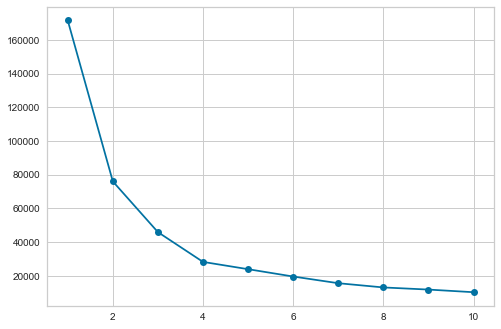

In [220]:
plt.plot(range(1,11),a,marker="o")
plt.show()

**cluster i kütühaneyle bulma**

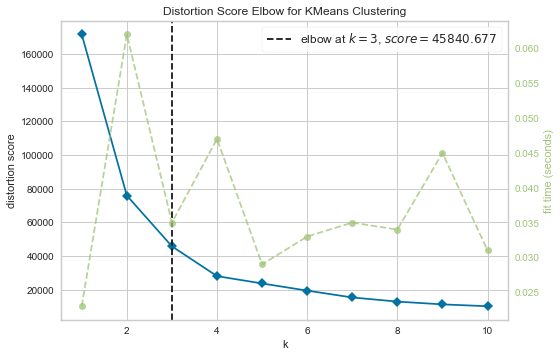

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [221]:
from yellowbrick.cluster import KElbowVisualizer 
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans,k=(1,11))
elbow.fit(X)
elbow.show()

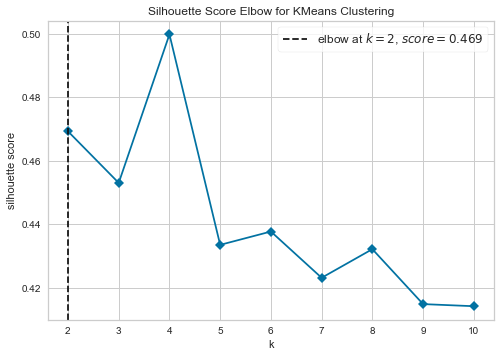

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [222]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=10, metric='silhouette', timings=False)
# Fit the data and visualize
visualizer.fit(X)    
visualizer.show()


<AxesSubplot:ylabel='count'>

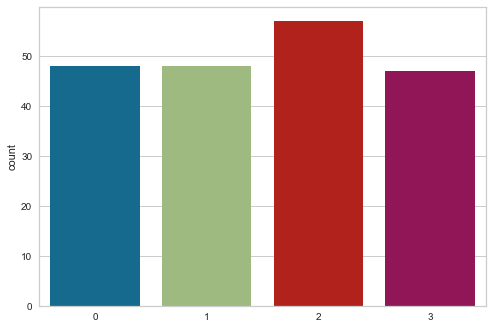

In [223]:
kmeans = KMeans(n_clusters=4, init = "k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)
sns.countplot(x=y_kmeans)


Kümeleri görselleştirme

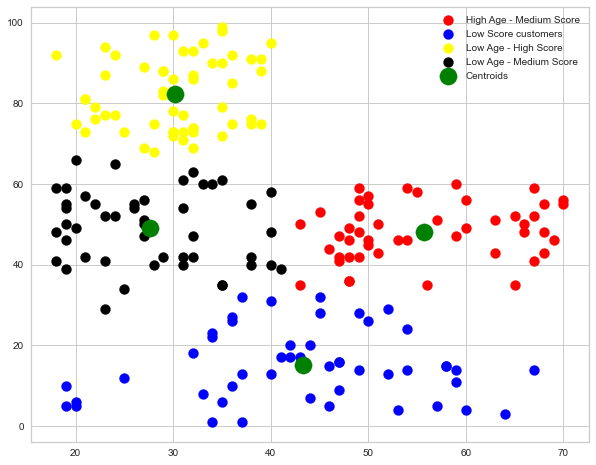

In [224]:
plt.figure(figsize=(10,8))
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1] , s=100, c="red", label = 'High Age - Medium Score') # s = noktaların büyüklüğü
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1] , s=100, c="blue", label = 'Low Score customers')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1] , s=100, c="yellow", label = 'Low Age - High Score')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1] , s=100, c="black", label = 'Low Age - Medium Score')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300, c="green" ,label = 'Centroids')
plt.legend()
plt.show()


Doğruluk skorları

In [225]:
silhouette_score_kmeans = silhouette_score(X,y_kmeans)
calinski_harabasz_score_kmeans = calinski_harabasz_score(X,y_kmeans)
print("silhouette_score:", silhouette_score_kmeans,"\ncalinski_harabasz_score:", calinski_harabasz_score_kmeans)

silhouette_score: 0.49973941540141753 
calinski_harabasz_score: 332.5631268443306


**Segmentation using Age and Spending Score (Hierarchial clustering)**

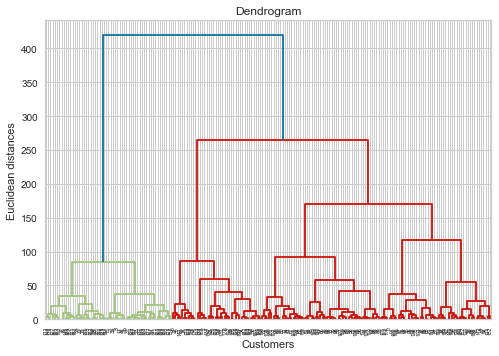

In [226]:
X = df[['Age', 'Spending Score (1-100)']].values
dendogram = sch.dendrogram(sch.linkage(X,method="ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [227]:
hc = AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="ward")
y_hc = hc.fit_predict(X)

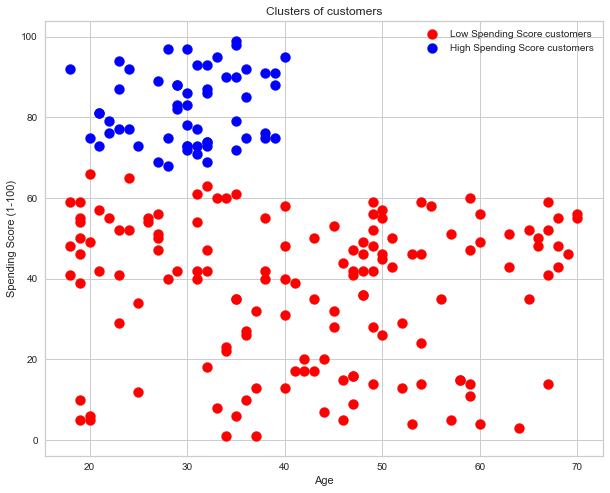

In [228]:
plt.figure(figsize = (10,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Low Spending Score customers')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'High Spending Score customers')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [229]:
silhouette_score_hc = round(silhouette_score(X, y_hc), 2)
calinski_harabasz_score_hc = round(calinski_harabasz_score(X, y_hc), 2)
print("silhouette_score:", silhouette_score_hc,"\ncalinski_harabasz_score:", calinski_harabasz_score_hc)

silhouette_score: 0.45 
calinski_harabasz_score: 210.56


## **2.Annual Income-Spending Score**

In [255]:
X = df[["Annual Income (k$)","Spending Score (1-100)"]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

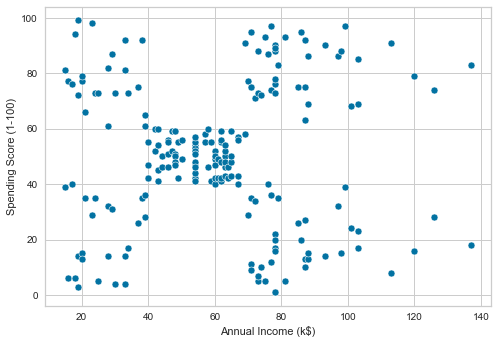

In [241]:
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df)

In [242]:
d = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(X)
    d.append(kmeans.inertia_)
d

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25011.839349156595,
 21862.09267218289,
 19672.07284901432]

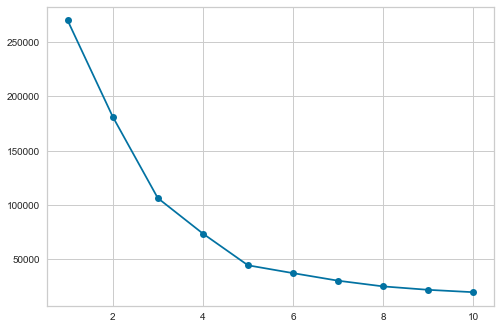

In [243]:
plt.plot(range(1, 11), d, marker = 'o')

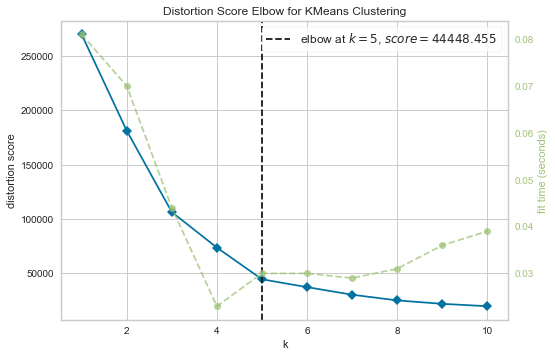

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [244]:
elbow = KElbowVisualizer(kmeans,k=(1,11))
elbow.fit(X)
elbow.show()

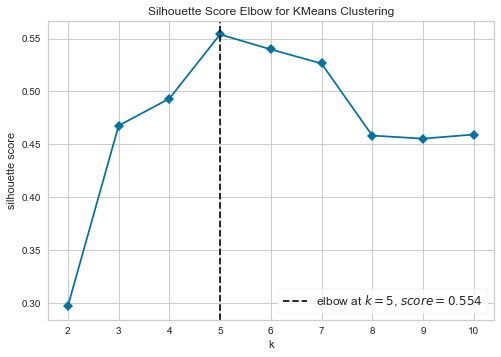

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [245]:
model = KMeans(random_state=42)
visual = KElbowVisualizer(model,k=10,metric="silhouette",timings=False)
visual.fit(X)
visual.show()

<AxesSubplot:ylabel='count'>

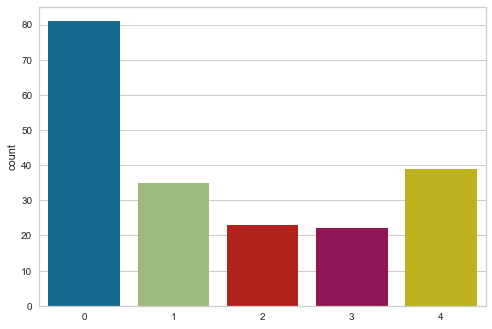

In [246]:
kmeans = KMeans(n_clusters=5,init="k-means++",random_state=42)
y_kmeans = kmeans.fit_predict(X)
sns.countplot(y_kmeans)

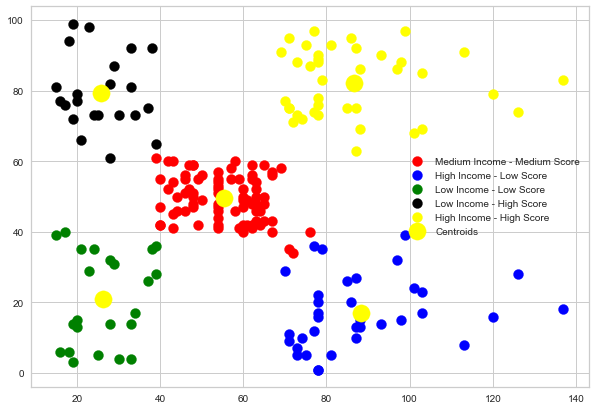

In [249]:
plt.figure(figsize = (10, 7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Medium Income - Medium Score')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'High Income - Low Score')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Low Income - Low Score')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'black', label = 'Low Income - High Score')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'yellow', label = 'High Income - High Score')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

**Doğruluk skorlarını hesaplama**

In [250]:
silhouette_score_kmeans = silhouette_score(X, y_kmeans)
calinski_harabasz_score_kmeans = calinski_harabasz_score(X, y_kmeans)
print("silhouette_score:", silhouette_score_kmeans,"\ncalinski_harabasz_score:", calinski_harabasz_score_kmeans)

silhouette_score: 0.553931997444648 
calinski_harabasz_score: 247.35899338037282


In [254]:
df["cluster"] = kmeans.labels_  #hangi kümenin kime ait olduğunu belirleyen sütun ekledik.
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,2
1,1,21,15,81,3
2,0,20,16,6,2
3,0,23,16,77,3
4,0,31,17,40,2


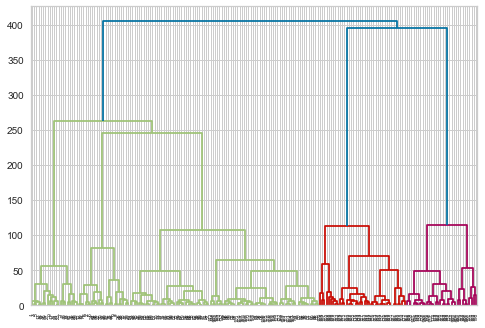

In [256]:
X = df[["Annual Income (k$)","Spending Score (1-100)"]].values
dendogram = sch.dendrogram(sch.linkage(X,method="ward"))
plt.show()

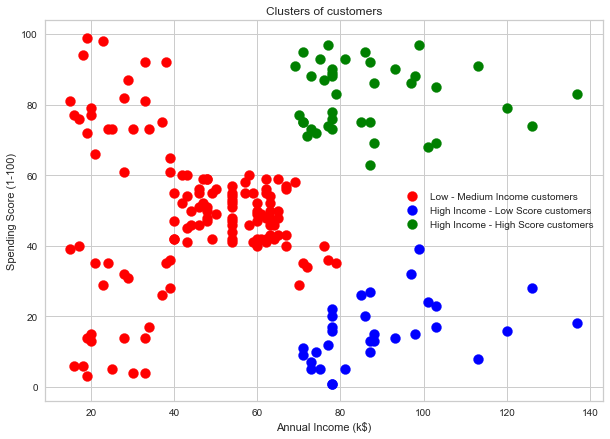

In [263]:
hc = AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
y_hc = hc.fit_predict(X)

plt.figure(figsize = (10, 7))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Low - Medium Income customers')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'High Income - Low Score customers')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'High Income - High Score customers')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [264]:
silhouette_score_hc = round(silhouette_score(X, y_hc), 2)
calinski_harabasz_score_hc = round(calinski_harabasz_score(X, y_hc), 2)
print("silhouette_score:", silhouette_score_hc,"\ncalinski_harabasz_score:", calinski_harabasz_score_hc)


silhouette_score: 0.46 
calinski_harabasz_score: 143.82


## **3.Age, Annual Income, and Spending Score**

In [292]:
X = df[["Age","Annual Income (k$)","Spending Score (1-100)"]].values
X

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

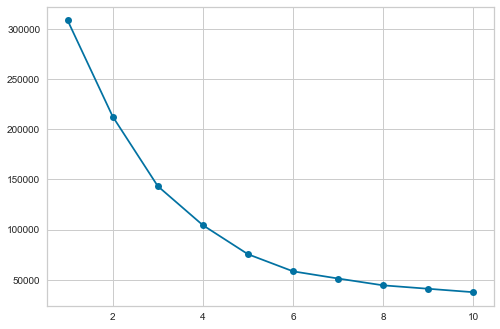

In [268]:
s = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit_predict(X)
    s.append(kmeans.inertia_)
plt.plot(range(1,11),s,marker="o")
plt.show()

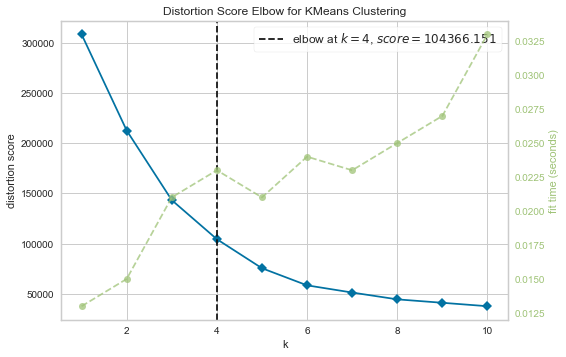

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [269]:
elbow = KElbowVisualizer(kmeans,k=(1,11))
elbow.fit(X)
elbow.show()

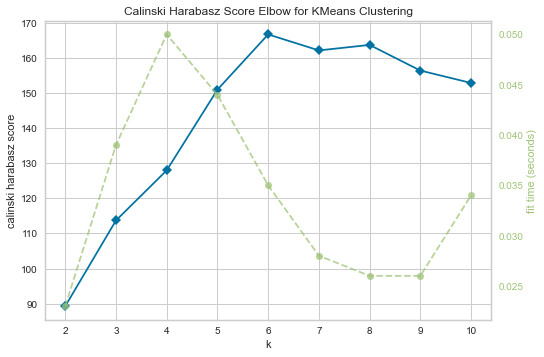

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [278]:
model = KMeans(random_state=42)
vis = KElbowVisualizer(model,k=(2,11),metric='calinski_harabasz',timing=False)
vis.fit(X)
vis.show()

<AxesSubplot:ylabel='count'>

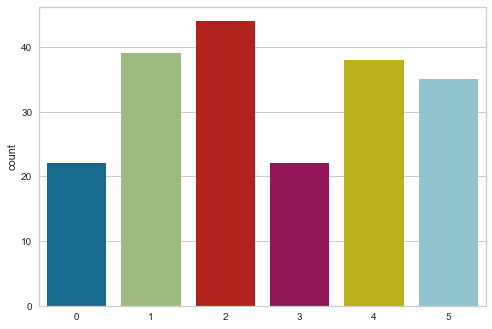

In [279]:
kmeans = KMeans(n_clusters=6,init="k-means++",random_state=42)
y_kmeans = kmeans.fit_predict(X)
sns.countplot(y_kmeans)

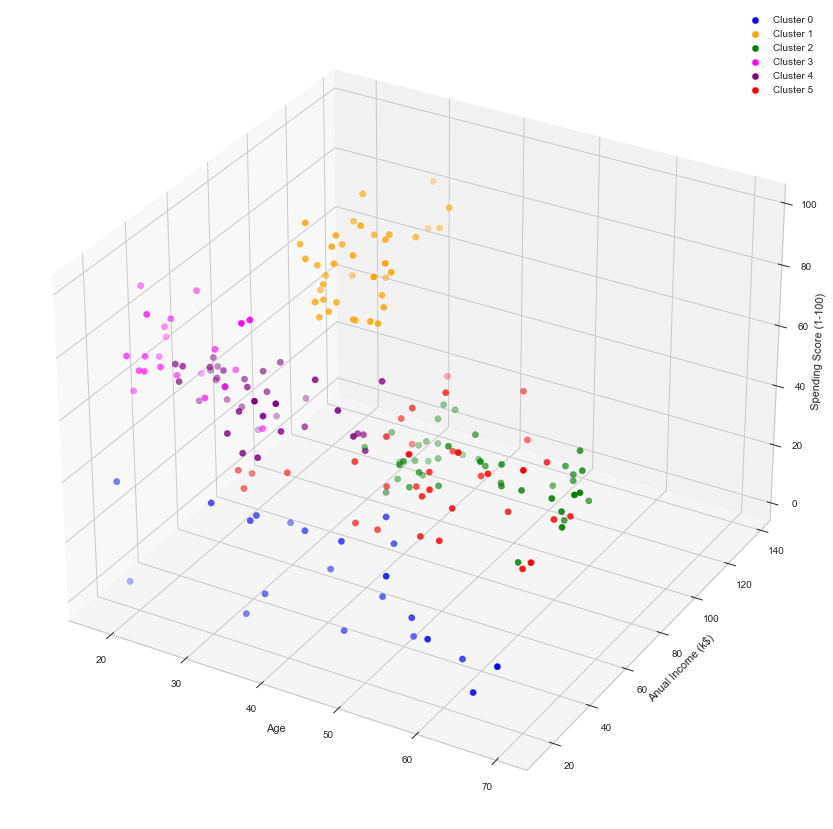

In [290]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], s = 40 , color = 'blue', label = "Cluster 0")
ax.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], s = 40 , color = 'orange', label = "Cluster 1")
ax.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], s = 40 , color = 'green', label = "Cluster 2")
ax.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], X[y_kmeans == 3, 2], s = 40 , color = 'magenta', label = "Cluster 3")
ax.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], X[y_kmeans == 4, 2], s = 40 , color = 'purple', label = "Cluster 4")
ax.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], X[y_kmeans == 5, 2], s = 40 , color = 'red', label = "Cluster 5")
ax.set_xlabel('Age')
ax.set_ylabel('Anual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.legend()
plt.show()

In [291]:
silhouette_score_kmeans = round(silhouette_score(X, y_kmeans), 2)
calinski_harabasz_score_kmeans = round(calinski_harabasz_score(X, y_kmeans), 2)
print("silhouette_score:", silhouette_score_hc,"\ncalinski_harabasz_score:", calinski_harabasz_score_hc)


silhouette_score: 0.46 
calinski_harabasz_score: 143.82
